# Happy Or Sad Emoji 😃

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.preprocessing import image

In [4]:
#if we want to stop further training we can use it
class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('acc')>.999):
            print("Reached 99.9% accuracy")
            self.model.stop_training=True
callback = myCallBack()

In [5]:
base_dir ='.../tensorflow_in_practise/happy-or-sad' 

In [6]:
#define model
model= Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [7]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['acc'])

In [8]:
#converting image to tensor 
train_datagen = ImageDataGenerator(rescale=1/255)

In [31]:
train_generator = train_datagen.flow_from_directory(
base_dir,
target_size = (150,150),
class_mode = 'binary',    
batch_size=128    
)


Found 80 images belonging to 2 classes.


In [10]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs=15,
    verbose=1
)


Epoch 1/15
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
8/8 [==============================] - 11s 1s/step - loss: 0.9245 - acc: 0.5000
Epoch 2/15
8/8 [==============================] - 8s 971ms/step - loss: 0.5228 - acc: 0.7359
Epoch 3/15
8/8 [==============================] - 8s 976ms/step - loss: 0.1882 - acc: 0.9734
Epoch 4/15
8/8 [==============================] - 8s 983ms/step - loss: 0.0649 - acc: 0.9828
Epoch 5/15
8/8 [==============================] - 8s 967ms/step - loss: 0.0234 - acc: 1.0000
Epoch 6/15
8/8 [==============================] - 8s 1s/step - loss: 0.0080 - acc: 1.0000
Epoch 7/15
8/8 [==============================] - 8s 1s/step - loss: 0.0033 - acc: 1.0000
Epoch 8/15
8/8 [==============================] - 8s 1s/step - loss: 0.0014 - acc: 1.0000
Epoch 9/15
8/8 [==============================] - 9s 1s/step - loss: 6.1550e-04 - acc: 1.0000
Epoch 10/15
8/8 [==============================] - 9s 1s/step - loss: 3.1390e-0

In [44]:
print(history.history['acc'])

[0.5, 0.7359375, 0.9734375, 0.9828125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [11]:
model.save("happysad.h5")

In [12]:
# INFERENCE : PROCESS OF PREDCTING IMAGES FROM MODEL

In [16]:
loaded_model = tf.keras.models.load_model("happysad.h5")
loaded_model.layers[0].input_shape

(None, 150, 150, 3)

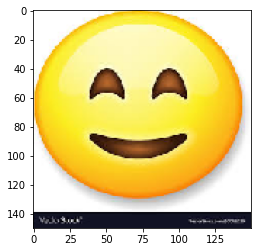

In [41]:
img_path = base_dir + '/happy.jpeg'

img = image.load_img(img_path,target_size=(150,150))
img = image.img_to_array(img)
img = img/255

import matplotlib.pyplot as plt
plt.imshow(img)

In [42]:
img = img.reshape(1,150,150,3)
result=loaded_model.predict_classes(img)
for i in result:
    if i[0]==0:
        print("Happy")
    else:
        print("Sad")


Happy
